# OBESITY RISK

###  Problem Statement

#### How eating high calorie food,Consumption of alcohol, Number of main meals, Physical activity frequency,Transportation used affect on obesity levels 

## About dataset

##### The Dataset consist of the esitimation of obesity levels in people from countries of Mexico, Peru and Colombia.The data is collected from people ages between 18 and 61.

### Features related to eating habits are:
    1.frequntly eating of high calorie food(FAVC)
    2.fequency of cousumption of vegetables(FCVC)
    3.Number of main meals(NCP)
    4.Comsumption of food between meals(CAEC)
    5.Comsumption of water daily(CH20)
    6.Comsumption of alcohol(CALc)

### Features related to physical condition are:
    1.Calories consumption monitoring(SCC)
    2.Physical activity frequency(FAF)
    3.Time using technology device(TUE)
    4.Transportation used(MTRANS)

In [3]:
import os 
%pwd

'c:\\Users\\SACHIN\\PycharmProjects\\Obesity-Risk-\\notebook'

In [4]:
os.chdir('../')

### IMPORTING REQUIRED LIBRARIES

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

### LOADING DATASET

In [6]:
df = pd.read_csv('artifacts\data_ingestion\\train_data.csv')

In [7]:
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


### CHECKING INFORMATION (NULL COUNT AND FEATURE DATATYPE)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [9]:
df.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


<Axes: xlabel='Age', ylabel='Count'>

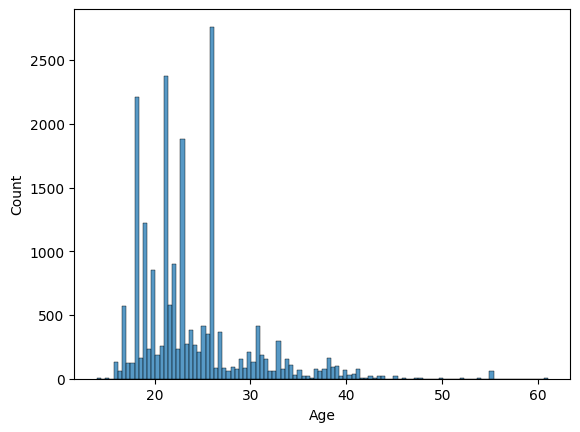

In [10]:
sns.histplot(df['Age'], )

### INSIGHTS
1. 75% of peoples are under 26 age
2. 50% of people are under 22 age
3. minimum age is 14 and maximum age is 61
4. minimum weight is 36kg
5. maximum weight is 166kg

### CHECKING NULL VALUES 

In [11]:
df.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

### UNIQUE VALUES IN CATEGORICAL FEATURES

In [12]:
for unique_values in df.select_dtypes(include=object).columns:
    print(f"unique values in {unique_values}: {len(df[unique_values].unique())}")

unique values in Gender: 2
unique values in family_history_with_overweight: 2
unique values in FAVC: 2
unique values in CAEC: 4
unique values in SMOKE: 2
unique values in SCC: 2
unique values in CALC: 3
unique values in MTRANS: 5
unique values in NObeyesdad: 7


In [13]:
for unique_values in df.select_dtypes(include=object).columns:
    print(f"unique values in {unique_values}: {df[unique_values].unique()}")

unique values in Gender: ['Male' 'Female']
unique values in family_history_with_overweight: ['yes' 'no']
unique values in FAVC: ['yes' 'no']
unique values in CAEC: ['Sometimes' 'Frequently' 'no' 'Always']
unique values in SMOKE: ['no' 'yes']
unique values in SCC: ['no' 'yes']
unique values in CALC: ['Sometimes' 'no' 'Frequently']
unique values in MTRANS: ['Public_Transportation' 'Automobile' 'Walking' 'Motorbike' 'Bike']
unique values in NObeyesdad: ['Overweight_Level_II' 'Normal_Weight' 'Insufficient_Weight'
 'Obesity_Type_III' 'Obesity_Type_II' 'Overweight_Level_I'
 'Obesity_Type_I']


In [14]:
le = LabelEncoder()
Age = le.fit_transform(df['Age'])
NObeyesdad = le.fit_transform(df['NObeyesdad'])

### COMPAREING OBESITY LEVELS IN MALE AND FEMALE

In [34]:
maping = {'Insufficient_Weight':0 ,'Normal_Weight':1 ,'Obesity_Type_I':2 ,'Obesity_Type_II':3,
 'Obesity_Type_III':4, 'Overweight_Level_I':5 ,'Overweight_Level_II':6}


<Axes: xlabel='NObeyesdad', ylabel='Count'>

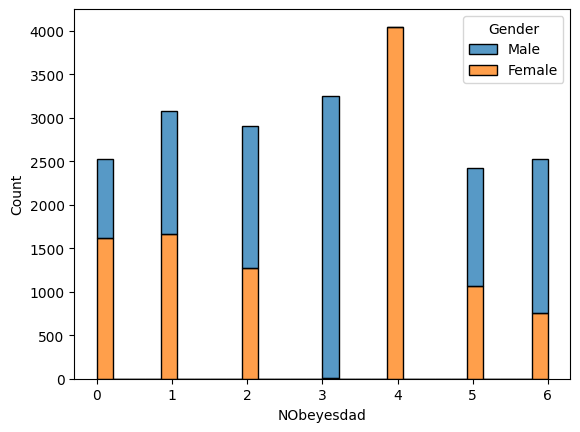

In [35]:
sns.histplot(df,x = df['NObeyesdad'].map(maping), hue=df['Gender'], multiple='stack' )

In [54]:
df['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

### INSIGHTS
1. There are all males in obesity level 2
2. There are all females in obesity level 3
3. Out of 2500 peoples 1500 females have Insufficient_Weight, and 1000 males have Insufficient_Weight.
4. 'Normal_Weight', 'Obesity_Type_I', 'Overweight_Level_I' levels are equal in males and females.
5. outof 2500 peoples approximately 1500 males are Overweight_Level 2, and approximately 1000 females are Overweight_Level 2.

<Axes: xlabel='Age', ylabel='Count'>

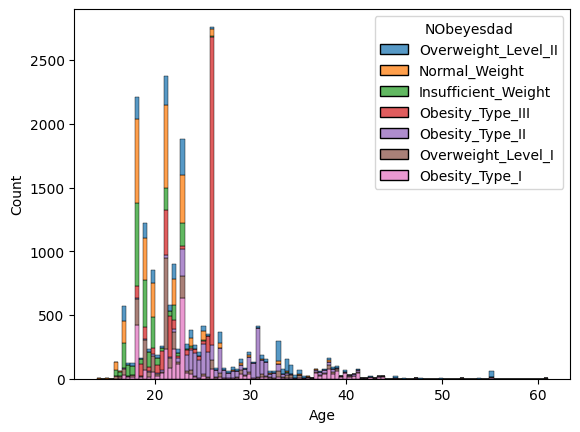

In [17]:
sns.histplot(df, x=df['Age'],hue=df['NObeyesdad'], multiple='stack' )

1. Around 2500 people of 26 years of age 